In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "campania"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,15,Campania,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,15,Campania,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,15,Campania,2,0,2,1,3,3,3,...,0.0,0.0,0.0,1.0,0.00,66.67,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,15,Campania,2,0,2,2,4,1,1,...,0.0,203.0,0.0,1.0,0.00,50.00,0.49,0.00,0.00,33.33
4,2020-02-29T17:00:00,15,Campania,3,0,3,10,13,9,9,...,0.0,160.0,0.0,8.0,0.00,23.08,5.62,0.00,0.00,225.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,2020-12-09T17:00:00,15,Campania,1852,138,1990,95223,97213,-1552,1361,...,44.0,15872.0,10036.0,-1504.0,6.93,2.05,8.57,13.56,-1.43,-1.57
289,2020-12-10T17:00:00,15,Campania,1789,140,1929,94236,96165,-1048,1198,...,57.0,14106.0,10002.0,-987.0,7.26,2.01,8.49,11.98,1.45,-1.08
290,2020-12-11T17:00:00,15,Campania,1828,144,1972,92508,94480,-1685,1340,...,63.0,18023.0,13521.0,-1728.0,7.30,2.09,7.43,9.91,2.86,-1.75
291,2020-12-12T17:00:00,15,Campania,1794,137,1931,92158,94089,-391,1414,...,47.0,19663.0,11034.0,-350.0,7.09,2.05,7.19,12.81,-4.86,-0.41


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 13, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1219
Nuovi tamponi: 17319.0
Percentuale nuovi positivi/nuovi tamponi: 7.000000000000001 %
Nuovi guariti: 2013.0
Nuovi deceduti: 35.0
Variazione positivi ricoverati con sintomi: 10.0
Variazione positivi in terapia intensiva: -3.0
Variazione positivi in isolamento dimiciliare: -836.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 13, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-14T17:00:00,15,Campania,735,61,796,11647,12443,665,818,...,2.0,11396.0,8087.0,625.0,7.66,6.40,7.18,10.11,-1.61,5.65
1,2020-10-15T17:00:00,15,Campania,762,66,828,12416,13244,801,1127,...,9.0,13780.0,11096.0,769.0,7.97,6.25,8.18,10.16,8.20,6.44
2,2020-10-16T17:00:00,15,Campania,786,67,853,13501,14354,1110,1261,...,3.0,14222.0,11345.0,1085.0,7.85,5.94,8.87,11.12,1.52,8.38
3,2020-10-17T17:00:00,15,Campania,817,75,892,14798,15690,1336,1410,...,0.0,14704.0,11426.0,1297.0,8.41,5.69,9.59,12.34,11.94,9.31
4,2020-10-18T17:00:00,15,Campania,849,78,927,15938,16865,1175,1376,...,2.0,14256.0,9865.0,1140.0,8.41,5.50,9.65,13.95,4.00,7.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-09T17:00:00,15,Campania,1852,138,1990,95223,97213,-1552,1361,...,44.0,15872.0,10036.0,-1504.0,6.93,2.05,8.57,13.56,-1.43,-1.57
57,2020-12-10T17:00:00,15,Campania,1789,140,1929,94236,96165,-1048,1198,...,57.0,14106.0,10002.0,-987.0,7.26,2.01,8.49,11.98,1.45,-1.08
58,2020-12-11T17:00:00,15,Campania,1828,144,1972,92508,94480,-1685,1340,...,63.0,18023.0,13521.0,-1728.0,7.30,2.09,7.43,9.91,2.86,-1.75
59,2020-12-12T17:00:00,15,Campania,1794,137,1931,92158,94089,-391,1414,...,47.0,19663.0,11034.0,-350.0,7.09,2.05,7.19,12.81,-4.86,-0.41


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

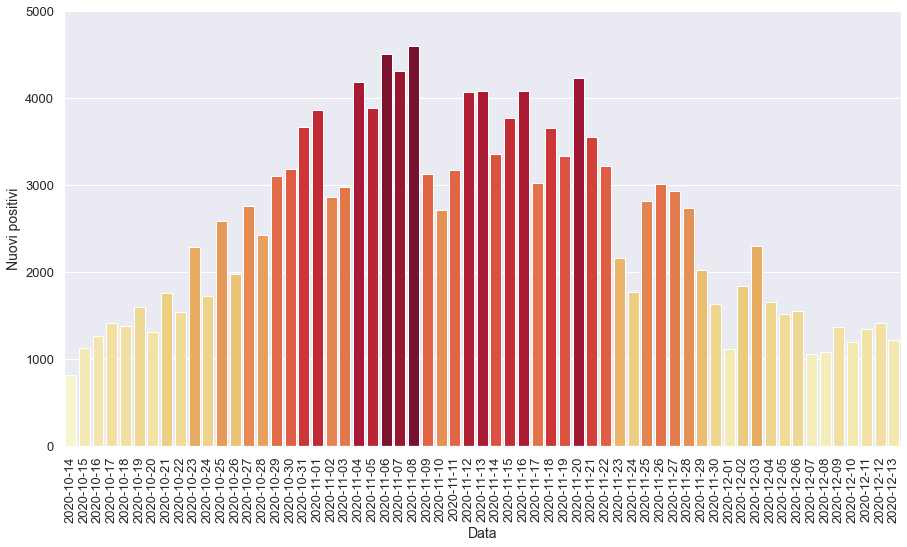

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

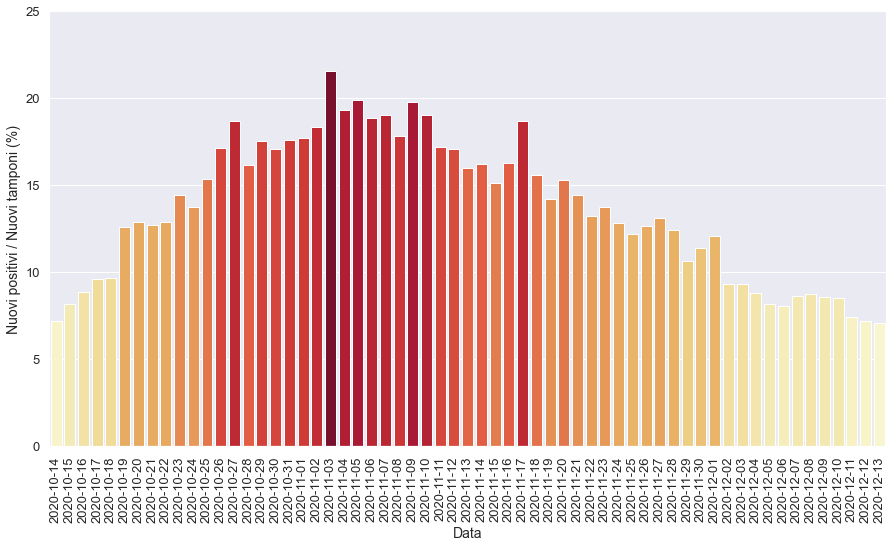

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

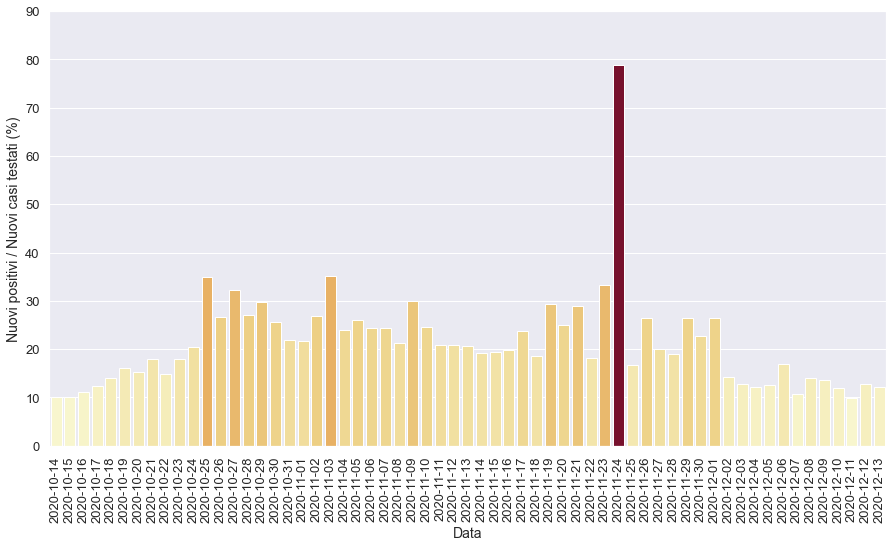

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

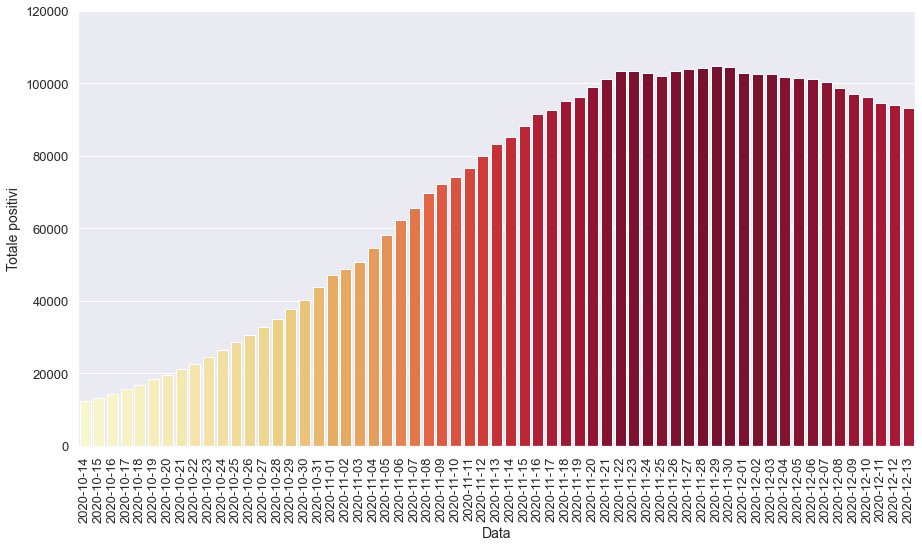

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

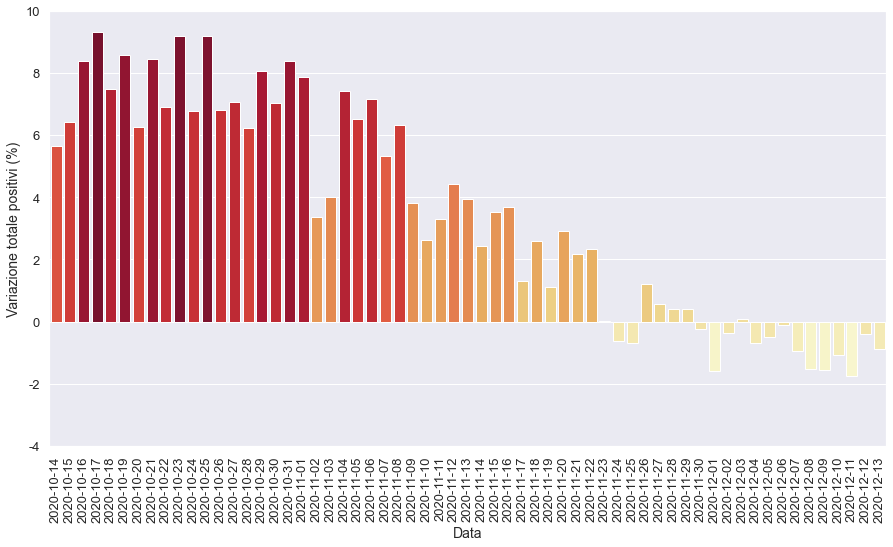

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

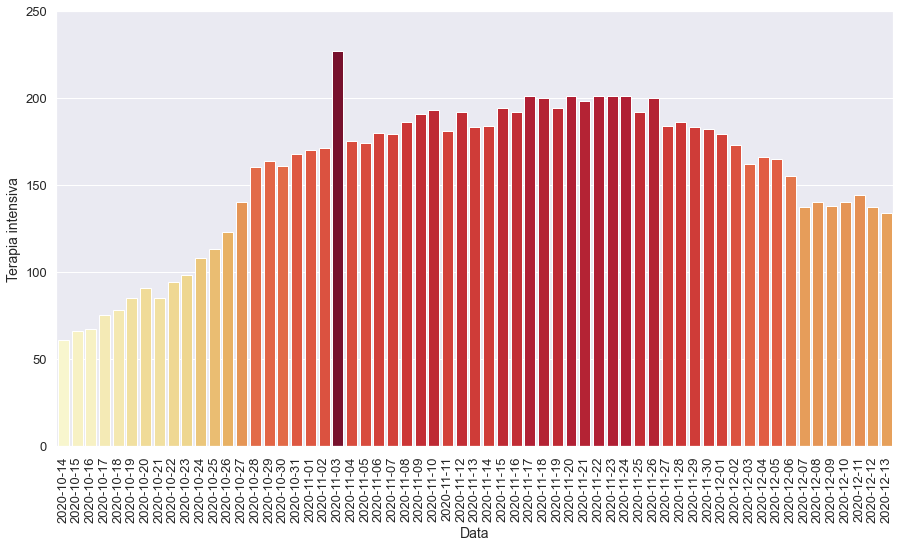

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

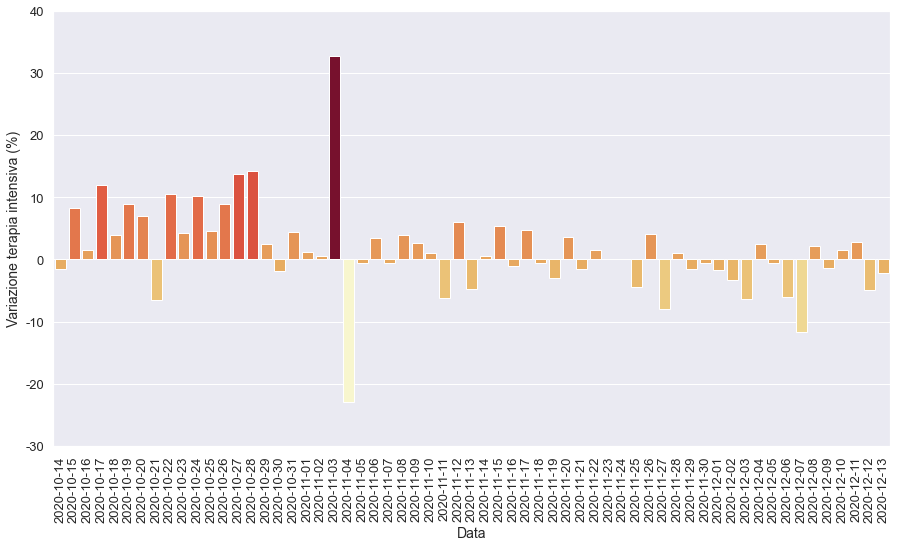

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

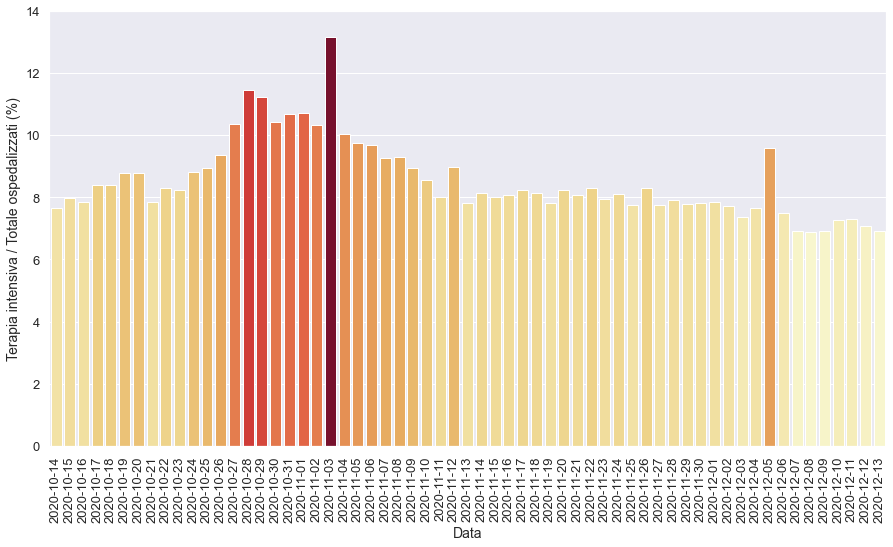

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

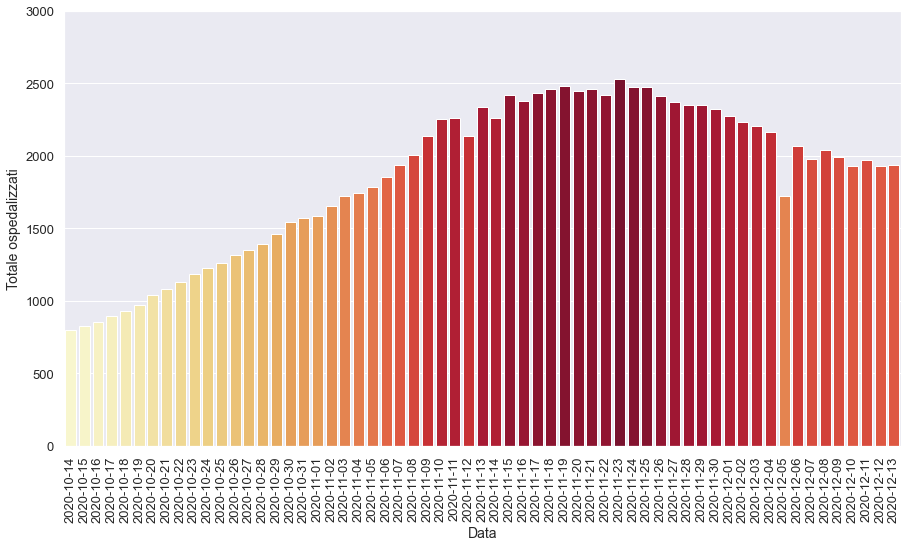

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

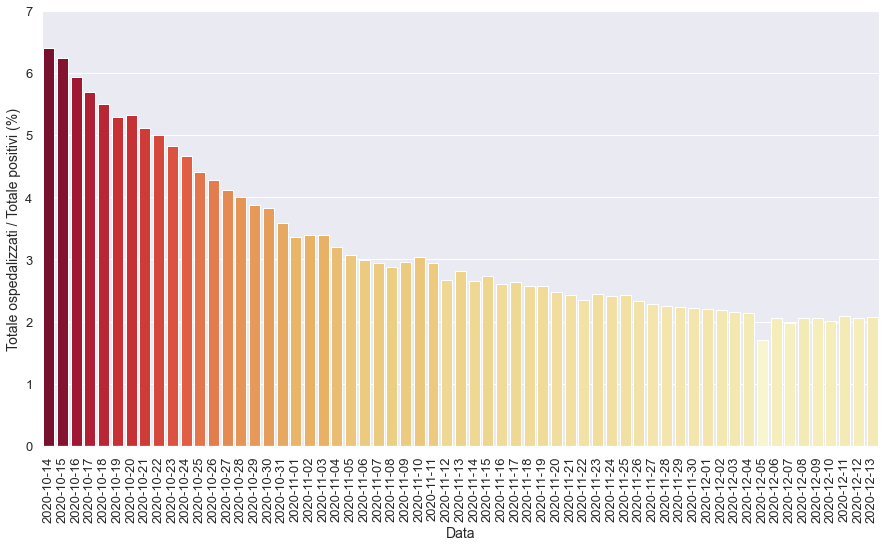

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

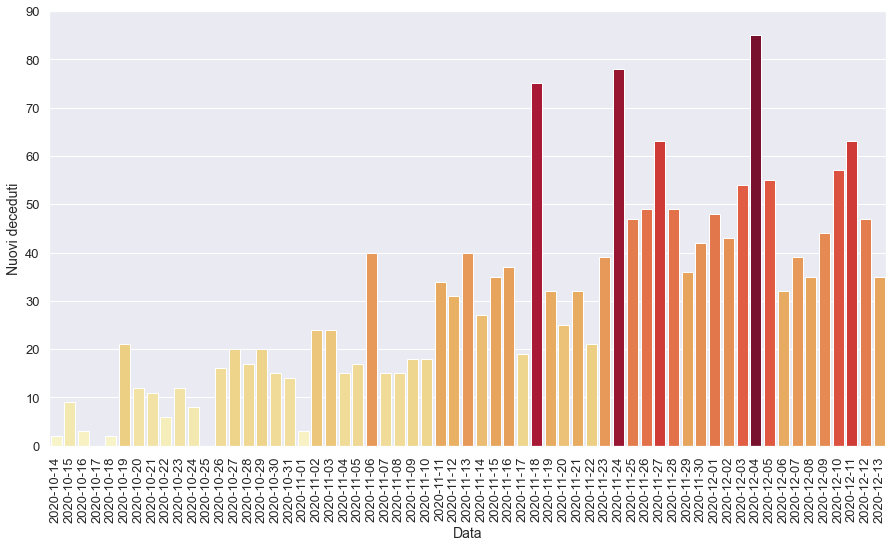

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

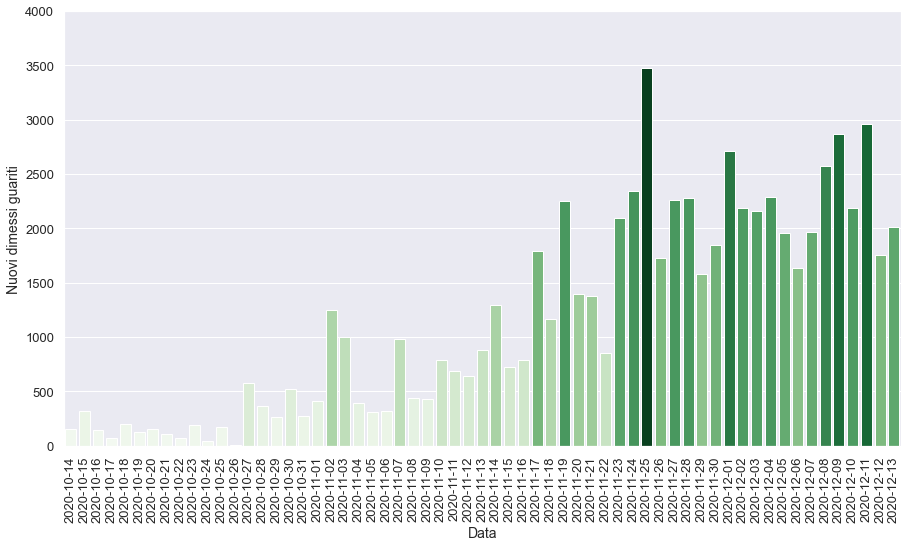

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-13T17:00:00,15,Campania,2153,183,2336,80884,83220,3161,4079,...,40.0,25510.0,19678.0,2961.0,7.83,2.81,15.99,20.73,-4.69,3.95
1,2020-11-14T17:00:00,15,Campania,2080,184,2264,82982,85246,2026,3351,...,27.0,20662.0,17496.0,2098.0,8.13,2.66,16.22,19.15,0.55,2.43
2,2020-11-15T17:00:00,15,Campania,2224,194,2418,85839,88257,3011,3771,...,35.0,24948.0,19523.0,2857.0,8.02,2.74,15.12,19.32,5.43,3.53
3,2020-11-16T17:00:00,15,Campania,2190,192,2382,89132,91514,3257,4079,...,37.0,25110.0,20653.0,3293.0,8.06,2.60,16.24,19.75,-1.03,3.69
4,2020-11-17T17:00:00,15,Campania,2236,201,2437,90289,92726,1212,3019,...,19.0,16178.0,12734.0,1157.0,8.25,2.63,18.66,23.71,4.69,1.32
5,2020-11-18T17:00:00,15,Campania,2259,200,2459,92680,95139,2413,3657,...,75.0,23479.0,19634.0,2391.0,8.13,2.58,15.58,18.63,-0.50,2.60
6,2020-11-19T17:00:00,15,Campania,2287,194,2481,93705,96186,1047,3334,...,32.0,23496.0,11397.0,1025.0,7.82,2.58,14.19,29.25,-3.00,1.10
7,2020-11-20T17:00:00,15,Campania,2244,201,2445,96547,98992,2806,4226,...,25.0,27649.0,16941.0,2842.0,8.22,2.47,15.28,24.95,3.61,2.92
8,2020-11-21T17:00:00,15,Campania,2260,198,2458,98677,101135,2143,3554,...,32.0,24692.0,12294.0,2130.0,8.06,2.43,14.39,28.91,-1.49,2.16
9,2020-11-22T17:00:00,15,Campania,2218,201,2419,101062,103481,2346,3217,...,21.0,24332.0,17694.0,2385.0,8.31,2.34,13.22,18.18,1.52,2.32


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

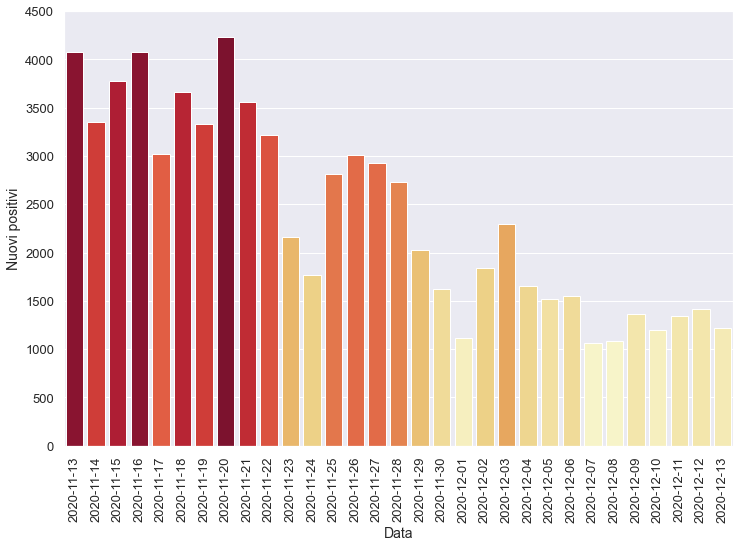

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

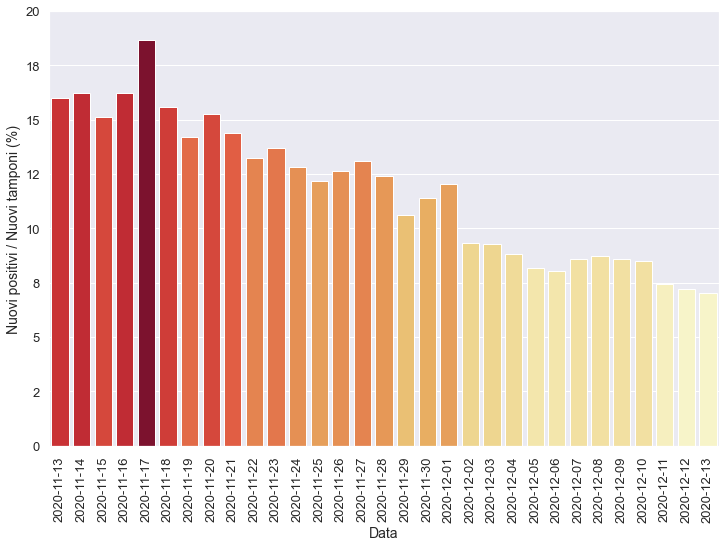

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

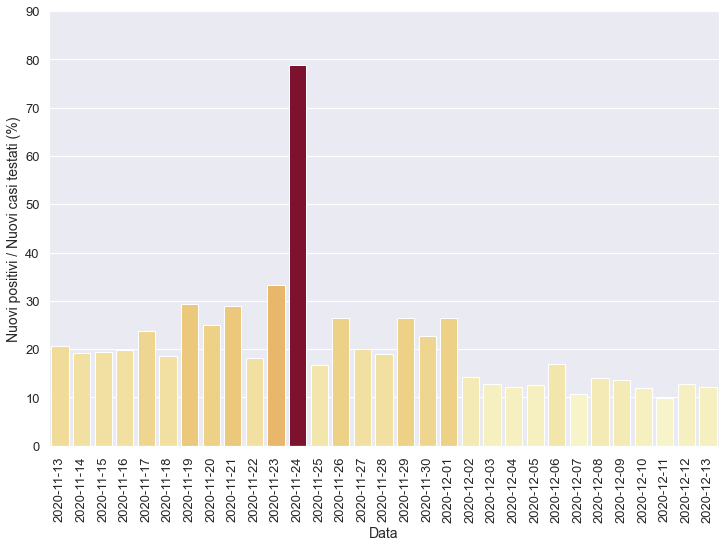

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

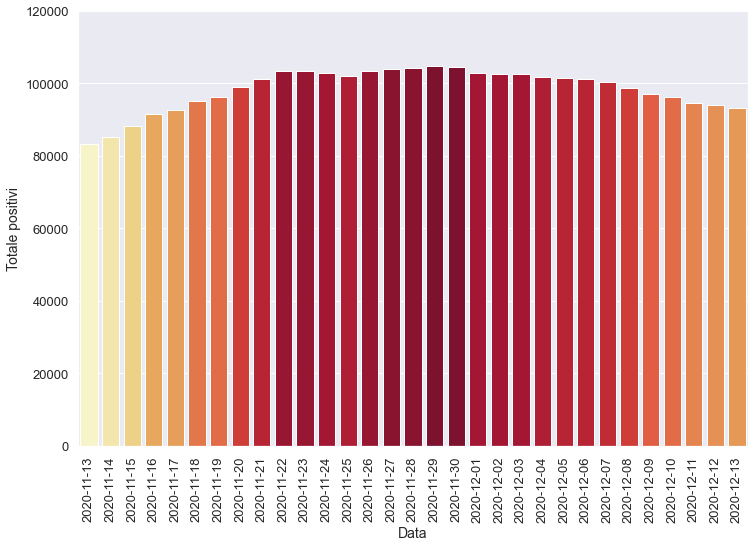

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

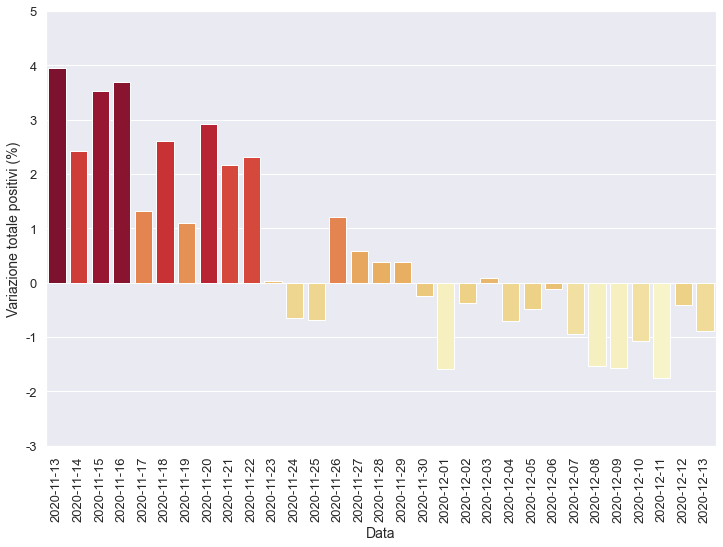

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

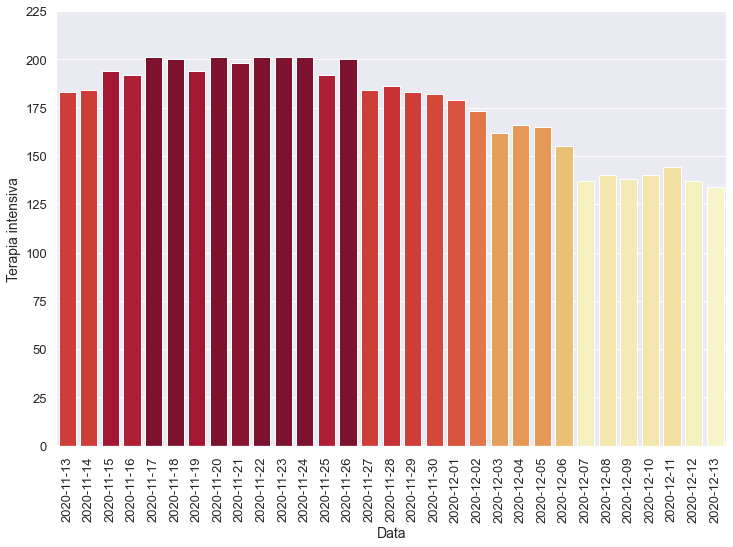

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

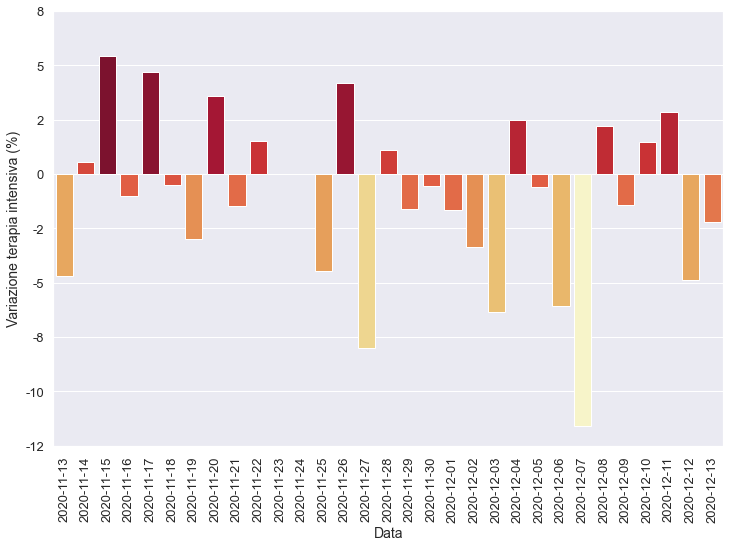

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

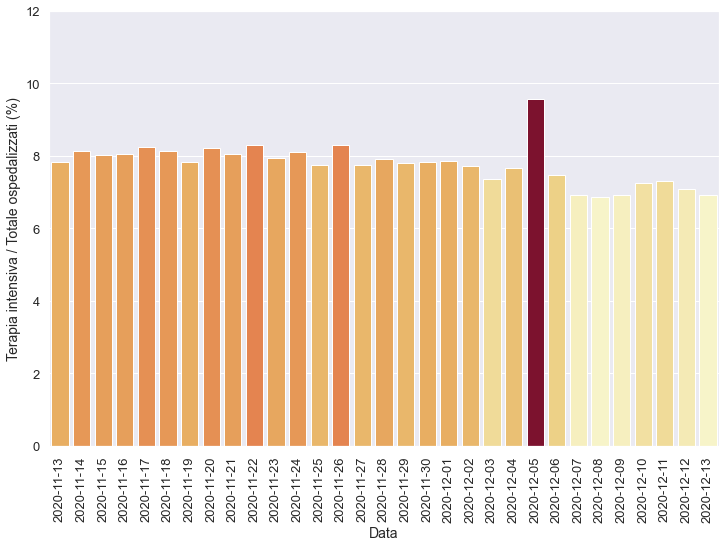

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

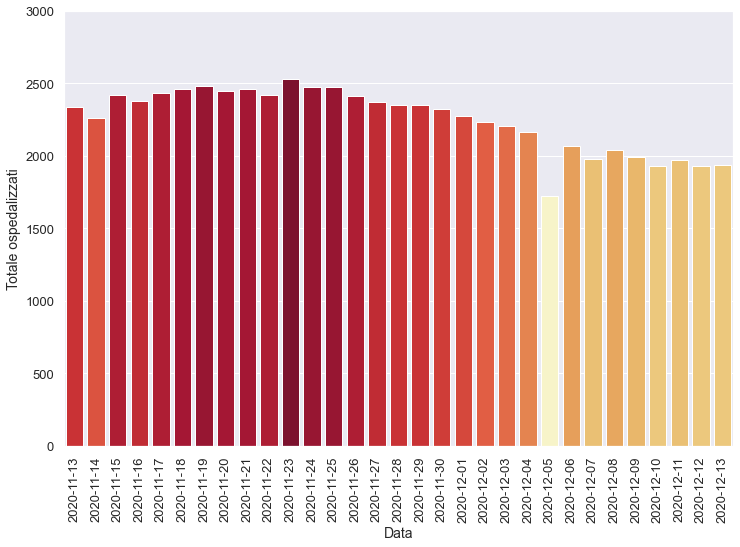

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

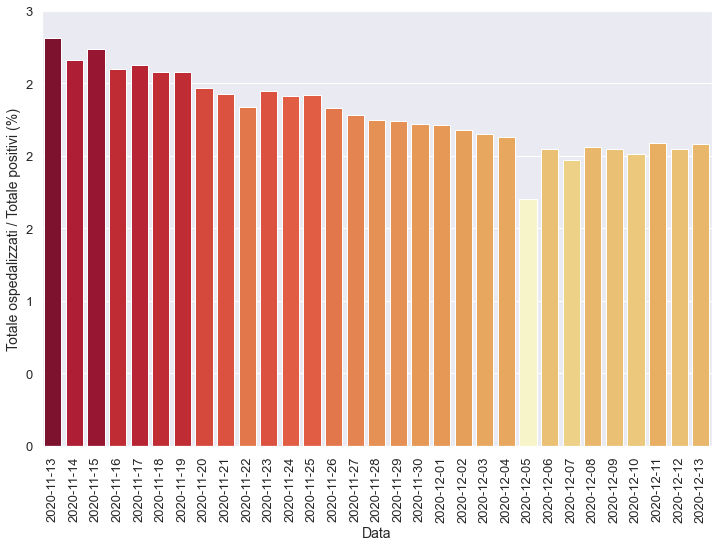

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

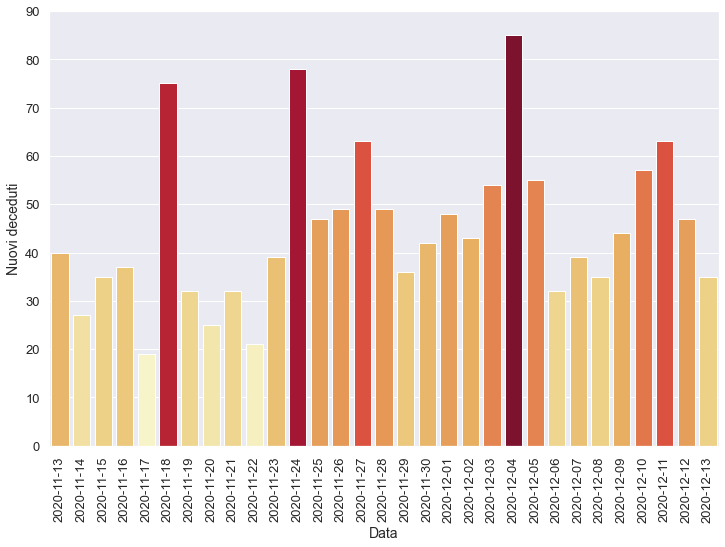

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

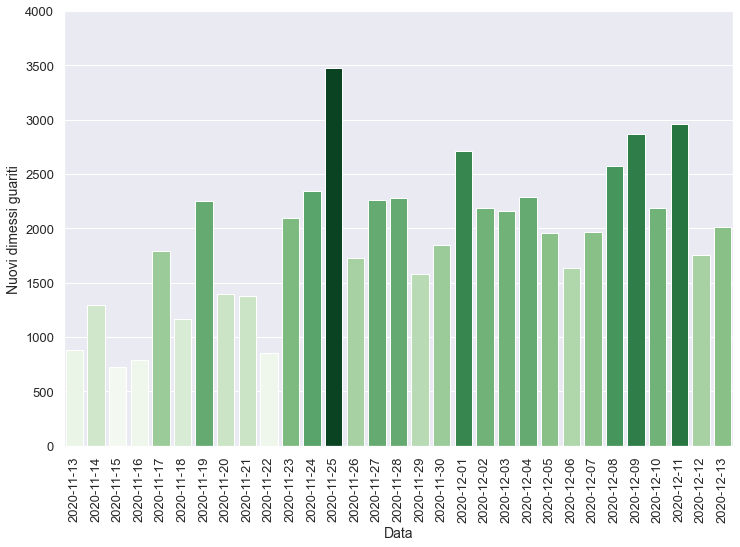

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-06T17:00:00,15,Campania,1916,155,2071,99172,101243,-118,1552,...,32.0,19313.0,9204.0,-466.0,7.48,2.05,8.04,16.86,-6.06,-0.12
1,2020-12-07T17:00:00,15,Campania,1840,137,1977,98318,100295,-948,1060,...,39.0,12330.0,9861.0,-854.0,6.93,1.97,8.60,10.75,-11.61,-0.94
2,2020-12-08T17:00:00,15,Campania,1898,140,2038,96727,98765,-1530,1080,...,35.0,12360.0,7643.0,-1591.0,6.87,2.06,8.74,14.13,2.19,-1.53
3,2020-12-09T17:00:00,15,Campania,1852,138,1990,95223,97213,-1552,1361,...,44.0,15872.0,10036.0,-1504.0,6.93,2.05,8.57,13.56,-1.43,-1.57
4,2020-12-10T17:00:00,15,Campania,1789,140,1929,94236,96165,-1048,1198,...,57.0,14106.0,10002.0,-987.0,7.26,2.01,8.49,11.98,1.45,-1.08
5,2020-12-11T17:00:00,15,Campania,1828,144,1972,92508,94480,-1685,1340,...,63.0,18023.0,13521.0,-1728.0,7.30,2.09,7.43,9.91,2.86,-1.75
6,2020-12-12T17:00:00,15,Campania,1794,137,1931,92158,94089,-391,1414,...,47.0,19663.0,11034.0,-350.0,7.09,2.05,7.19,12.81,-4.86,-0.41
7,2020-12-13T17:00:00,15,Campania,1804,134,1938,91322,93260,-829,1219,...,35.0,17319.0,10032.0,-836.0,6.91,2.08,7.04,12.15,-2.19,-0.88


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

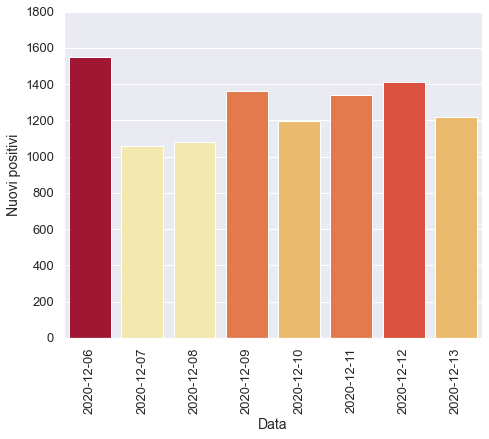

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

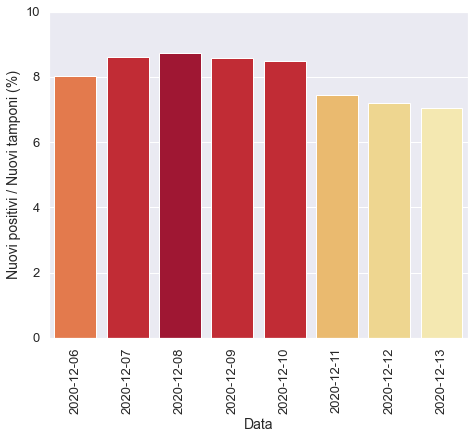

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

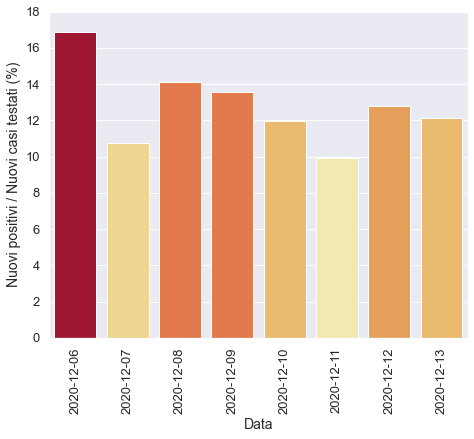

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

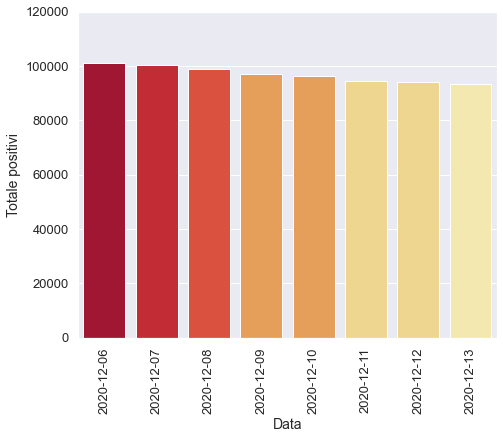

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

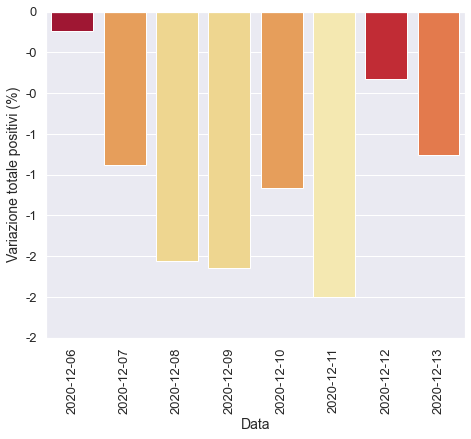

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

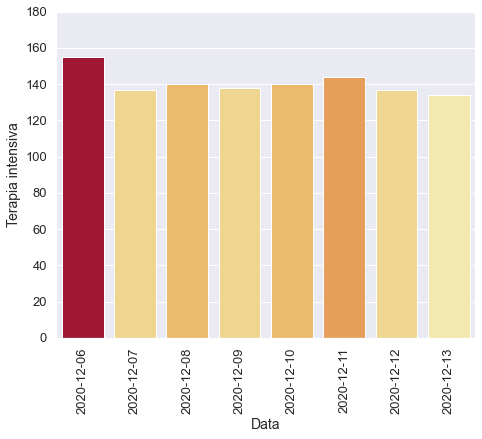

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

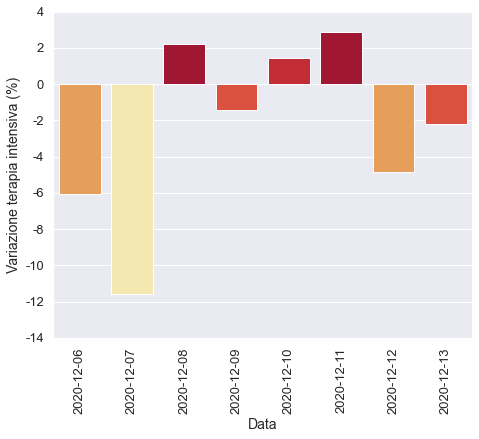

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

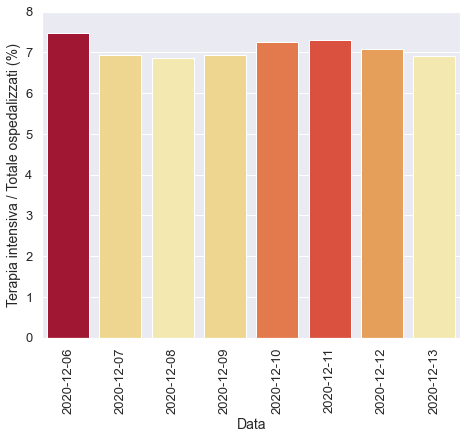

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

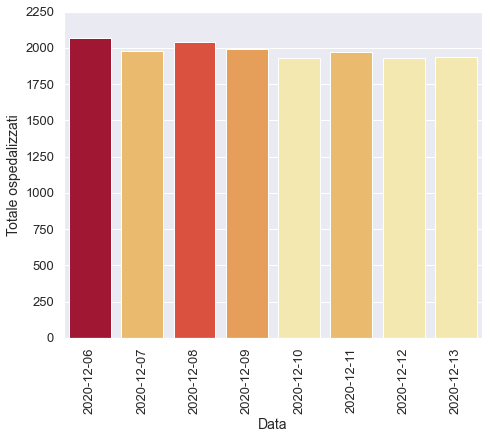

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

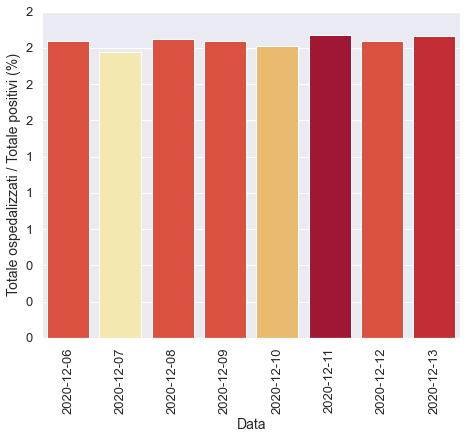

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

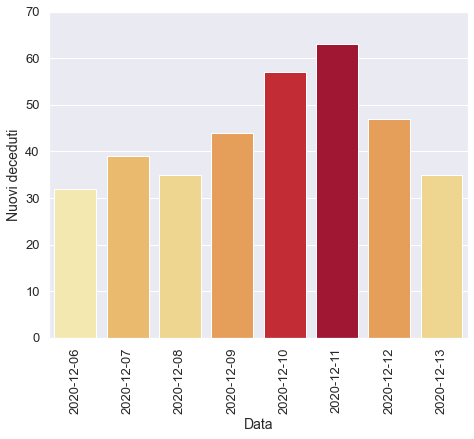

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

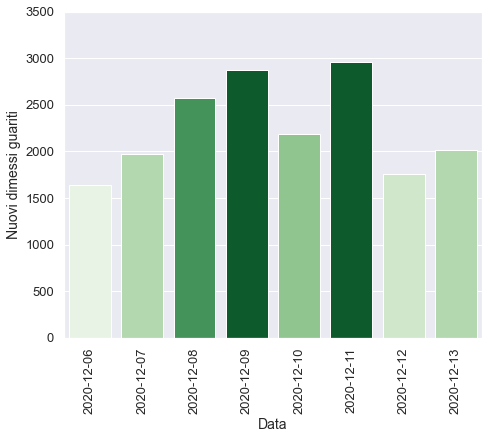

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)